# 3. Labor: Lineáris Logisztikus regresszió

A gyakorlat során megvizsgáljuk, hogy hogyan tudunk egy regressziós módszer (folyamatos kimeneti változó) segítségével bináris (igen/nem) kimenetet modellezni.

### Felvételi siker:

A feladatban tanulók tanulmányi eredményei alapján szeretnék előrejelezni, hogy felvételt nyernek-e egy adott oktatási intézménybe.

Egy általános iskolai pedagógus szeretné megtudni, hogy mely diákoknak lenne szüksége extra segíségre és felkészülésre ahhoz, hogy sikeresen felvételizzenek egy hatosztályos gomnáziumba. Ehhez rendelkezésre áll számára korábbi diákjainak:
- irodalom és matematika évvégi szintfelmérő eredmények az 5. év végéről (%)
- sikerült-e az adot diáknak felvételt nyernie a kiszemelt gimnáziumba ([0, 1])

## Logisztikus regresszió

A már ismert lineáris regressziós modell segítségével a magyarázó változó segítségével egy $[-\infty; +\infty]$ tartományon lévő, folytonos kimeneti változót tudunk modellezni. Ezzel szemben nekünk egy ${0, 1}$ értékű bináris eseményt kell prediktálnunk, azaz a bemeneti adatok alapján "igen" / "nem" kategóriába kell osztályoznunk a bemeneti mintákat.

Mivel ezen modellek lényege a predikció, kézenfekvő újrafogalmazása a feladatnak, ha nem közvetlenül a sikernek a tényét próbáljuk megadni, hanem az adott bemeneti adatok mellett a siker $[0, 1]$ tartományon folytonos **valószínűségét**  modellezzük:

$$0 \leq P_{\mathbf{x}} = P(y=1|\mathbf{x}) \leq 1$$

Amennyiben találunk valamilyen transzformációt, amellyel a $P_{\mathbf{x}}$ változót a $[0, 1]$ tartományról a $[0, +\infty]$ tartományra tudjuk transzormálni, akkor ebből logaritmus segítségével már könnyen $[-\infty; +\infty]$ tartományú változót csinálhatunk:

$$ ln(f(P_{\mathbf{x}})) = w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_n x_n $$

Keresünk tehát egy olyan $f(x)$ függvényt, amely folytonos, és:

$$ \lim_{x \to 0} f(x) = 0, $$
$$ \lim_{x \to 1} f(x) = + \infty.$$

Az első feltétel teljesíthető egy alábbi alakú függvénnyel:
$$ f(x) = \frac{x \cdot f_a(x)}{f_b(x)},$$
feltéve, hogy $f_a(x)$ a nullában nem tart a végtelenhez, és $f_b(x)$ a nullában nem tart a nullához.

A második feltétel teljesíthető egy alábbi alakú függvénnyel:
$$ f(x) = \frac{f_a(x)}{(1-x)\cdot f_b(x)},$$
feltéve, hogy $f_a(x)$ az egyben nem tart a nullához, és $f_b(x)$ az egyben nem tart a végtelenhez.

A fenti két feltételt teljesítő legegyszerűbb függvény:
$$f(x) = \frac{x}{1-x}$$

Ezek alapján a lineáris regresszióval az alábbi változó értékét tudjuk modellezni:
$$\ln(\frac{P_{\mathbf{x}}}{1-P_{\mathbf{x}}}) = w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_n x_n = \mathbf{w} \cdot \mathbf{x}$$
ahol az $\mathbf{x}$ vektor már tartalmazza a bias változót. Az összefüggést átalakítva megkaphatjuk a logisztikus regresszió alapját képző összefüggést:

$$ \frac{P_{\mathbf{x}}}{1-P_{\mathbf{x}}} = e^{\mathbf{w} \cdot \mathbf{x}} $$
$$ \frac{1-P_{\mathbf{x}}}{P_{\mathbf{x}}} = \frac{1}{P_{\mathbf{x}}} - \frac{P_{\mathbf{x}}}{P_{\mathbf{x}}}= e^{-\mathbf{w} \cdot \mathbf{x}} $$
$$ \frac{1}{P_{\mathbf{x}}} = 1+e^{-\mathbf{w} \cdot \mathbf{x}} $$
$$ P_{\mathbf{x}} = \frac{1}{1+e^{-\mathbf{w} \cdot \mathbf{x}}} $$

Az így meghatározott függvényalakot gyakran **Sigmoid** függvénynek nevezzük:
$$\boxed{ sigmoid(z) = g(z) = \frac{1}{1+e^{-z}} }$$

<!---
<center><img src="img/sigmoid.svg" width="600"></center>
-->
<center><img src="https://drive.google.com/uc?export=view&id=1MjNqCGi3LrA6GQcXOC84uvermZW0n-z7" width="600"></center>

A végleges modellünk a bináris változó becslésére, a lineáris regressziónál is alkalmazott mátrixos formában felírva, ahol a sigmoid függvényt a bementei argumentumára elemeneként kell alkalmazni:
$$ \boxed{ \mathbf{\hat{Y}} = sigmoid(\mathbf{X} \cdot \mathbf{W}) } $$

### A bináris klasszifikáció költségfüggvénye

A lineáris regressziónál megszokott MSE költségfüggvény a bináris klasszifikáció esetére is alkalmazható, azonban:
- az optimálistól távoli súlyok esetén a tanulás nagyon lassú lehet a sigmoid görbe alakja miatt
- a gradiens számítása kevésbé kellemes

*Tipp:* a gyakorlat anyaga akár megoldható az MSE költségfüggvény és az ehhez tartozó megfelelő gradiens levezetésével és használatával is. Amennyiben a mélyebb megértés motivál valakit, érdemes ezt is implementálni, és összehasonlítani a két különböző módon kapott megoldásokat (tanulás sebessége, költésgfüggvények értékének alakulása, a modell által illesztett felület, a súlyok felett értelemzett optimalizálási felület).

A klasszifikáció esetén a költségfüggvényt a Maximum Likelihood módszer alapján állítjuk elő. A Maximum Likelihood becslés esetén
1. megvizsgáljuk, hogy adott modellparaméterek mellett mekkora az esélye, az egyes adatpontok előfordulásának
2. meghatározzuk a teljes adatsor valószínűségét adott modellparaméterek mellett
3. megkeressük azokat a modellparamétereket, amelyek mellett ez a valószínűség a lehető legnagyobb

A bevezetett logisztikus regressziós modell esetén annak a valószínűsége, hogy egy adott $\mathbf{x}$ bemeneti vektor esetén a magyarázott változó értéke 1 pontosan $P_x=\hat{y}=g(\mathbf{x} \cdot \mathbf{w})$, míg annak a valószínűsége, hogy a magyarázott változó értéke 0 pontosan $1-P_x = 1 - \hat{y} = 1 - g(\mathbf{x} \cdot \mathbf{w})$. Ezek alapján a regressziós paraméterek meghatározásával a
$$ l(\mathbf{w}) = \prod_{y^j=1} \left(g(\mathbf{x}^j \cdot \mathbf{w})\right) \prod_{y^j=0} \left(1-g(\mathbf{x}^j \cdot \mathbf{w})\right) $$
likelihood függvényt szeretnénk maximalizálni. Mivel 0 és 1 közötti valószínűségeket szorzunk össze, az eredmény is 0 és egy közötti, de a nulla közelében sokkal "sűrűbb" (ha sok mintapont van, még nagy valószínűségek esetén is egyre jobban 0 felé fog vándorolni a valószínűség). A logaritmus lépték használatával a 0-hoz közlebbi tartományon nagyobb "felbontást" kapunk.Ahol ennek a függvénynek maximuma van, ott a logaritmusának is maximuma van:
$$\ln \left(l(\mathbf{w})\right) = \ln \left( \prod_{y^j=1} \left(g(\mathbf{x}^j \cdot \mathbf{w})\right) \prod_{y^j=0} \left(1-g(\mathbf{x}^j \cdot \mathbf{w})\right) \right)$$
A $\log(a \cdot b) = \log(a)+\log(b)$ azonosság alapján:
$$\ln \left(l(\mathbf{w})\right) =  \sum_{y^j=1} \ln \left(g(\mathbf{x}^j \cdot \mathbf{w})\right) + \sum_{y^j=0} \ln \left(1-g(\mathbf{x}^j \cdot \mathbf{w})\right)$$
A feltételes szummázást a bináris magyarázott változó segítségével kiváltva:
$$\ln \left(l(\mathbf{w})\right) = \sum_{j=1}^m \left(y^j \cdot \ln \left(g(\mathbf{x}^j \cdot \mathbf{w})\right) + (1-y^j) \cdot \ln \left(1-g(\mathbf{x}^j \cdot \mathbf{w})\right) \right)$$
Ennek a függvénynek a maximalizálása egyenértékű a negatívjának a minimalizásálásval. A mintaelemszámtól függetlenítve az alábbi költségfüggvényt kapjuk:
$$\boxed{ C_{BCE} = \frac{1}{m} \sum_{j=1}^m \left(-y^j \cdot \ln (\hat{y}^j) - (1-y^j) \cdot \ln \left(1-\hat{y}^j\right) \right) }$$
Ezt a függvény Binary Cross-Entropy költségfüggvénynek nevezik, matematikai háttere az itt bemutatottnál jóval mélyebbre nyúlik. A keresztentrópia pontos statisztikai jelentésének feltárását igény szerint mindenki önállóan megteheti.

A költségfüggvényt megvizsgálva azt látjuk, hogy az adott adatpontra vonatkozóan a költségfüggvény komponens az alábbi alakot veszi fel:
$$ C_{BCE}(w) = {-\ln(\hat{y}), \qquad \text{ha}\ y=1} $$ 
$$ C_{BCE}(w) = {-\ln(1-\hat{y}),\qquad \text{ha}\ y=0} $$

<!---
<center><img src="img/BCE.svg" width="400"></center>
-->
<center><img src="https://drive.google.com/uc?export=view&id=1NdTXIkZPpt2OdHC3npFnUTkp5DQD0xHc" width="400"></center>


### A Binary Cross-Entropy költségfüggvényhez tartozó gradiens

A súlyok módosításához szükséges gradiens módszer alkalmazásához az új költségfüggvénnyel a gradiensvektor meghatározásához is új formula adódik. A parciális deriválást elvégezve a a gradiensvektor alakja mátrixos formában felírva:

$$ 
\boxed { \nabla C (\mathbf{W}) = 
\left[
	\begin{array}{c}
 		\frac{\delta C(\mathbf{W})}{\delta w_0}\\
		\frac{\delta C(\mathbf{W})}{\delta w_1}\\
        \frac{\delta C(\mathbf{W})}{\delta w_2}\\
 		\vdots\\
        \frac{\delta C(\mathbf{W})}{\delta w_n}\\
	\end{array}\right] 
= \frac{1}{m}\mathbf{X}^T \cdot (g(\mathbf{X} \cdot \mathbf{W}) - \mathbf{Y}) }
$$

## 00: Könyvtár importálások

Első lépésként importáljuk a feladat megoldása során használt könyvtárakat. Esetünkben ezek a következők lesznek:
- Numpy a matematikia műveletek elvégzéséhez
- Pandas az adatok beolvasásához és kezeléséhez
- MatPlotLib.pyplot az eredményeink ábrázolásához
- Plotly Express interaktív vizualizációhoz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Használjuk ezeket sötét téma esetén
plt.style.use('dark_background')
styleTemplate = 'plotly_dark'

# Használjuk ezeket világos téma esetén
#plt.style.use('default')
#styleTemplate = 'plotly_white'

## 01: Adatbeolvasás
Olvassuk be a szükséges adatokat a ''academicData.txt'' fájlból.

In [2]:
df = pd.read_csv('academicData.txt', sep = ',', header=0)    # Olvassuk be az adatokat egy Pandas DataFrame ojektumba
df.head(10)                                                  # Irassuk ki az első 10 sort, hogy ellenőrizzük sikerült-e a beolvasás

,Math,Literature,Acceptance
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


## 02: Adatfelfedezés

Új adthalmazzal történő első interrakció során érdemes azt először megvizsgálni, alapvető vizualizációkat ábrázolni, hogy legyen egy elsődleges "benyomás" az adatok jellegéről. Ábrázoljuk az adatokat egy X-Y diagrammon.

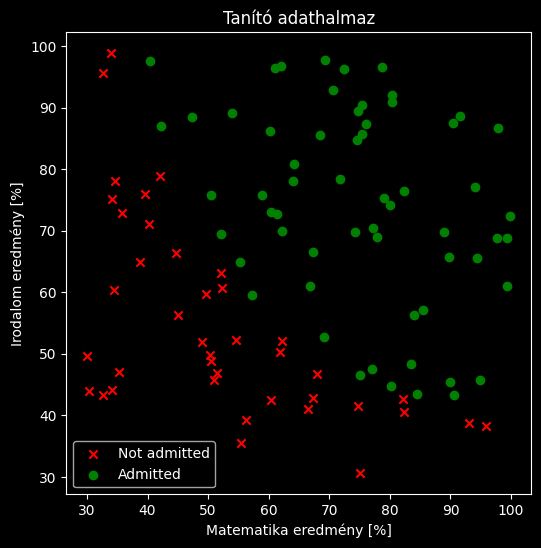

In [3]:
# Formális vizualizáció MatPlotLib-el
plt.figure(figsize=(6, 6))

plt.scatter(df[df['Acceptance'] == 0]['Math'], df[df['Acceptance'] == 0]['Literature'],marker='x',c="r", label="Not admitted")
plt.scatter(df[df['Acceptance'] == 1]['Math'], df[df['Acceptance'] == 1]['Literature'],marker='o',c="g", label="Admitted")

plt.title("Tanító adathalmaz")
plt.xlabel("Matematika eredmény [%]")
plt.ylabel("Irodalom eredmény [%]")
plt.legend(loc='lower left')

plt.show()

In [4]:
# Ábrázolás Plotly-val
fig = go.Figure()

# A magyarázott változót az előzőhöz hasonlóan transzponálni kell.
fig.add_trace(go.Scatter3d(x=df['Math'], y=df['Literature'], z=df['Acceptance'], mode= "markers"))

#Plot formázása
fig.update_layout(
    title = "Felvétel sikerességének ésélye teszteredmények függvényében",
    scene = dict(
        xaxis_title = "Matematika eredmény [%]",
        yaxis_title = "Irodalom eredmény [%]",
        zaxis_title = "Felvételi sikeressége"),
    template=styleTemplate,
    width=1600,
    height=800,
)

#Plot megjelenítése
fig.show()

## 03: Adatok előkészítése

A következő lépés az adatok esetleges előfeldolgozása és a modellillesztés elvégzéshez szükséges változók (mátrixok) létrehozása. 

In [5]:
X = df[['Math', 'Literature']].to_numpy() # Bemeneti változók oszlopainak kiemelése és tömmbé konvertálása
Y = df[['Acceptance']].to_numpy() # Kimeneti változó oszlopának kiemelése és tömmbé konvertálása

m,n = X.shape   
print('X:',X.shape)                                            # adattömbök méretének / adatok számának kiírása
print('Y:',Y.shape)
print('Adatok száma',m)
print('Változók (Feature) száma:',n)

X: (100, 2)
Y: (100, 1)
Adatok száma 100
Változók (Feature) száma: 2


Az előzőekhez hasonlóan itt is érdemes a bemeneti adatainkat normalizálni. A kimeneti változó bináris 0,1 értékű, így ezen nincs mit normalizálni.

**Feladat:** Végezze el az X változóinak normalizálását!

In [6]:
def featureNormalize(Z):
######################################################    
    mean = np.mean(Z, axis = 0) # 2x1 es (sorvektorral) tér vissza (az első elem az első oszlop átlaga, a második elem a második oszlop átlaga) 
    sigma = np.std(Z, axis = 0) # 2x1 es (sorvektorral) tér vissza (az első elem az első oszlop szórása, a második elem a második oszlop szórása)
    Z_norm = (Z-mean)/sigma #Numpyban lehetőség van mátrixból egy vektort kivonni/osztani, ha a méretek megfelelők. Ilyenkor a mátrixból soronként vonja ki/osztja a vektort.
######################################################
    return Z_norm, mean, sigma                            # képlet alapján eredmény visszaadása

print('Bementei adatok normalizálása ... \n')                    
X,Xmean,Xsigma = featureNormalize(X)                  # X standardizálása
print('Vizsgapontok átlaga:', Xmean)
print('Vizsgapontok szórása:', Xsigma, '\n')

Bementei adatok normalizálása ... 

Vizsgapontok átlaga: [65.64427406 66.22199809]
Vizsgapontok szórása: [19.36068671 18.48963567] 



A kiszámolt átlag és szórás értékeket meg kell őriznünk azért, hogy később a modellünk valós bemeneti értkekkel tudjon predikciót végrehajtani. A könnyebb kezelhetőség érdekében ezt érdemes dictionary változóba rendeznünk.

In [7]:
scaleFactors = {"Xmean" : Xmean, "Xsigma" : Xsigma}

Ellenőrizzuk a normalizálás sikerességét az új változók átlagának és szórásának kiszámításával!

In [8]:
print('Standardizált magyarázó változók átlaga:', np.mean(X,0))
print('Standardizált magyarázó változók változók szórása:', np.std(X,0), '\n')

Standardizált magyarázó változók átlaga: [-7.66053887e-17  1.14575016e-15]
Standardizált magyarázó változók változók szórása: [1. 1.] 



Amenniyben az átlagokra 0 közeli értéket, a szórásokra pedig 1 közelit kaptunk, a standardizálás sikeres volt.

**Feladat:** Egészítse ki az $\mathbf{X}$ mátrixot a bias változóval!

In [9]:
#X bővítése - csak egyszer futtassuk le a blokkot
######################################################
X = np.hstack([np.ones([X.shape[0], 1]), X])
######################################################
#  np.ones([X.shape[0], 1]) - létrehoz egy vektort, amelynek szélessége 1, magassága az X magassága.
#  np.hstack([A, B, C, D]) - a hstack horizontálisan egymás mellé illeszti a vektorokat, mátrixokat, amennyiben azok mérete megfelelő

In [10]:
# Ellenőrzés
if (X.shape[1] != 3):
    print('Az X mátrix mérete nem megfelelő, ellenőrizze!')
elif (np.sum(X, 0)[0] != 100):
    print('Az X mátrix bias változóval való kiegészítése nem megfelelő, ellenőrizze!')
else:
    print('X:',X.shape)                                            # adattömbök méretének / adatok számának kiírása

X: (100, 3)


## 04: Modell definiálása

Az adatok előkészítése utáni következő lépés a modell és tanítási logika definiálása.

**Feladat:** Definiálja a sigmoid függvényt!

In [11]:
#Sigmoid függény definiálása
def sigmoid(z):
############################################    
    g = 1/(1+np.exp(-z))
############################################    
    return g                               # szigmoid függvény értékének visszaadása

print('Függvény érték -6 bemenő értékre: %.3f' % sigmoid(-6))           # teszt -6 -ra
print('Függvény érték  0 bemenő értékre: %.3f' % sigmoid(0))            # teszt 0 -ra
print('Függvény érték  6 bemenő értékre: %.3f' % sigmoid(6))            # teszt 6 -ra 

if sigmoid(-6) < 0.01 and sigmoid(0) == 0.5 and sigmoid(6) > 0.99:
    print("\n A sigmoid() függvény megfelelő. Tovább mehet.")
else:
    print("\n Valami nem stimmel. Korrekció szükséges!")

Függvény érték -6 bemenő értékre: 0.002
Függvény érték  0 bemenő értékre: 0.500
Függvény érték  6 bemenő értékre: 0.998

 A sigmoid() függvény megfelelő. Tovább mehet.


In [45]:
x = np.linspace(-10, 10, 600)
y = sigmoid(x)

fig = go.Figure()
fig .add_trace(go.Scatter(x = x, y = y, mode='lines'))

fig .update_layout(
    template='plotly_dark',
    xaxis_title = "z",
    yaxis_title = "sigmoid(z)",
    title = "Sigmoid függvény",
    width=800,
    height=400,
    showlegend = False
)
fig .update_traces(line=dict( width=3))
fig .update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='grey', zeroline=True, zerolinewidth=3, zerolinecolor='grey')
fig .update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='grey', zeroline=True, zerolinewidth=3, zerolinecolor='grey')

fig.show()

**Feladat:** Készítse el a BCE költségfüggvényt (a NumPy könyvtárban a természetes logaritmus az `np.log()` metódussal számítható)!

In [13]:
# Költségfüggvény
def costBCE(X,Y,W):
#############################################     
   yHAT = sigmoid(X@W)
   C = np.mean(-Y * np.log(yHAT) - (1-Y) * np.log(1-yHAT))
############################################# 
   return C

In [14]:
initial_w = np.zeros(((n+1),1))                                             # kezdeti súlyok (null vektor) létrehozása
C = costBCE(X, Y, initial_w)                                                # költségfüggvény tesztelése 1

print('''BCE Költségfüvvény értéke nullvektor kezdeti súlyokra:
Várt költség (kb.): 0.693
Számított:''',C)

test_w = np.array([[-24], [13], [16]])                                      # teszt súlyok létrehozása [-24;0.2;0.2]
C = costBCE(X, Y, test_w)                                                   # költségfüggvény tesztelése 2
print('\nTeszt súlyok:\n',test_w)
print('''BCE Költségfüvvény értéke teszt súlyokra:
Várt költség (kb.): 7.74
Számított:''',C)

BCE Költségfüvvény értéke nullvektor kezdeti súlyokra:
Várt költség (kb.): 0.693
Számított: 0.6931471805599453

Teszt súlyok:
 [[-24]
 [ 13]
 [ 16]]
BCE Költségfüvvény értéke teszt súlyokra:
Várt költség (kb.): 7.74
Számított: 7.733307911943509


**Feladat:** Készítse el logisztikus regresszió problémájat gradiens módszerrel megoldó algoritmust! Az algoritmus számolja ki a kezdeti, majd minden iteráció utáni költéségfüggvény értéket is!

In [15]:
def logisticGradientDescent(X, Y, W, learning_rate, epochs):
    m = Y.size
    C_history = np.zeros(epochs+1)
    C_history[0] = costBCE(X,Y,W)
######################################################
    for epoch in range(epochs):
        dW = 1/m * X.T @ (sigmoid(X@W)-Y)
        W = W - learning_rate * dW
        C_history[epoch+1] = costBCE(X, Y, W)
    
######################################################
    return W,C_history

## 05: Modell tanítás

Futtassuk le a gradiens algoritmust és ellenőrizzük a kapott eredményeket, illetve vizsgáljuk meg a tanulási ráta hatását a tanulás folyamatára.

Gradiens algoritmus futtatása ...


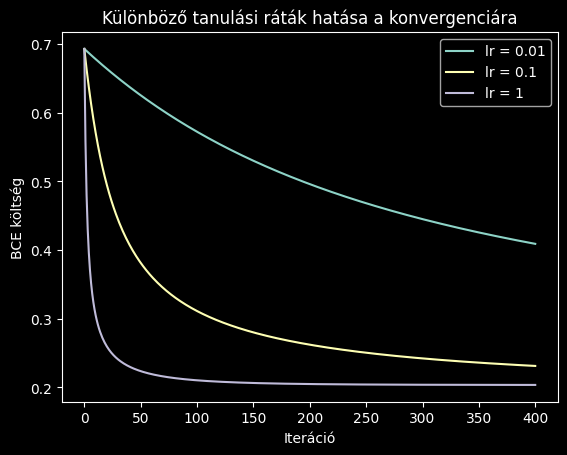

In [36]:
print('Gradiens algoritmus futtatása ...')
epochs = 400                                             # epoch szám
W=np.zeros([3,1])                                        # kezdeti súly (0;0;0)

W_a, C_history_a = logisticGradientDescent(X,Y,W,0.01,epochs)                             
plt.plot(range(C_history_a.size), C_history_a, label= "lr = 0.01")
                                                       
W_b, C_history_b = logisticGradientDescent(X,Y,W,0.1, epochs)                             
plt.plot(range(C_history_b.size), C_history_b, label= "lr = 0.1")

W, C_history = logisticGradientDescent(X,Y,W,1,epochs)
plt.plot(range(C_history.size), C_history, label= "lr = 1")

plt.title("Különböző tanulási ráták hatása a konvergenciára")
plt.xlabel("Iteráció")
plt.ylabel("BCE költség")
plt.legend()
plt.show()

A fenti ábrán láthatjuk, hogy a tanulási ráta miként befolyásolta az eredményünket: <br>
A tanulási rátát $(\mu)$ kicsi értéknek választva a konvergencia lassú. <br>
A tanulási rátát $(\mu)$ növelve a konvergencia gyorsul (azonban adott esetben túllőhet a célon, ingadozást okozhat).

In [27]:

print('''A tanulás végére kialakult költségfüggvény értéke:
Elvárt (hozzávetőleges): 0.203
Számított: %.04f''' % C_history[-1])

print('''Várt súlyok (hozzávetőlegesen):
[1.658 3.883 3.619]
Az algoritmus által számított súlyok: \n''', W.T)

A tanulás végére kialakult költségfüggvény értéke:
Elvárt (hozzávetőleges): 0.203
Számított: 0.2036
Várt súlyok (hozzávetőlegesen):
[1.658 3.883 3.619]
Az algoritmus által számított súlyok: 
 [[1.65947664 3.8670477  3.60347302]]


## 06: Modell értékelése

### 06.1: Predikció

A modell használatához és értékeléséhez szükség van a modellel történő predikció lehetőségére. A predikció kiszámítása során ügyelni kell, hogy a mintán ugyan azokat az előfeldolgozó lépéseket végre kell hajtani, mint a tanítás előtt az adatok előkészítésénél. Az új, predikció alapjául szolgáló adatot is normalizálni kell, illetve a BIAS-t hozzáfűzni. Ezek után az elmentett súlyvektrral a predikció számolható.

**Feladat:** Implementálja a modellhez tartozó predikció funkciót!

In [41]:
scaleFactors['Xmean']

array([65.64427406, 66.22199809])

In [42]:
scaleFactors['Xsigma']

array([19.36068671, 18.48963567])

In [57]:
def predict(X, W):              # predikciós függvény
###########################################
   #Normalizálás
   X_norm = (X-scaleFactors['Xmean'])/scaleFactors['Xsigma']
   X_input = [1, X_norm[0], X_norm[1]]
   prob = sigmoid(X_input@W)
   if prob > 0.5:
      pred = 1.0
   else:
      pred = 0   
###########################################    
   return prob, pred                                    

testScore = np.array([45, 85])
prob, pred = predict(testScore, W)            # eredmény 45 és 85 pontra
print('''A [45 , 85] teszteredményekre elvárt kimenet:
Felvéve (1) 0.767 valószínűséggel
Számított: %.0f; %.4f valószínűséggel''' % (pred, prob))

A [45 , 85] teszteredményekre elvárt kimenet:
Felvéve (1) 0.767 valószínűséggel
Számított: 1; 0.7678 valószínűséggel


### 06.2: Pontosság

Vizsgáljuk meg hogy teljesít a modell az eredeti adatok kiértékelése során. Ehhez számoljuk ki az algoritmus pontosságát (az eredeti adatok hány százalékábana dott jó választ.)

**Feladat:** Implementálja a pontosság számítást végző metódust!

In [58]:
def calculateAccuracy(X,Y,W):                               # pontosság függvény
#######################################
    prob = sigmoid(X@W)                                    # minden eredeti X-re kiszámoljuk a predikciót
    accuracy = np.mean((prob>0.5) == Y) *100                # ha nagyobb, mint 0.5 akkor pos ellenkező esetben neg                    
#######################################
    return accuracy                                         # összehasonlítjuk az Y elemeivel az eredményt és százalékot
                                                            # számolunk, ami tükrözi a pontosságot

print(float(calculateAccuracy(X,Y,W)), '% pontoság (hozzávetőlegesen. 89.0 % elvárt)')

89.0 % pontoság (hozzávetőlegesen. 89.0 % elvárt)


### 06.3: Döntési határ
A döntési határ (decision boundary) kirajzolása. Ez a vonal választja el egymástól a két osztályt. Jelen esetben ez a $P_x = 0.5$ vonal.

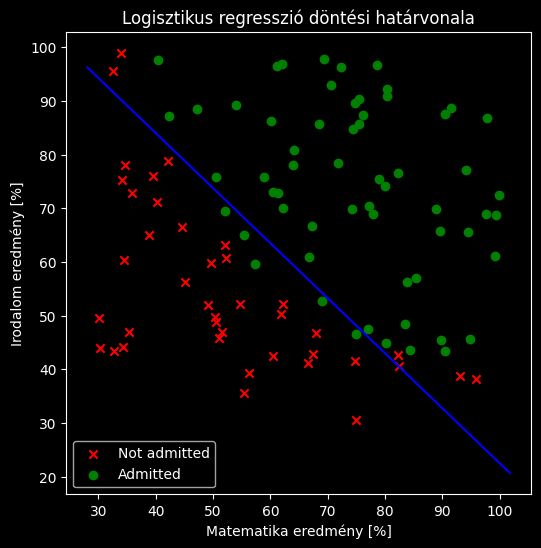

In [59]:
plt.figure(figsize=(6, 6))

plt.scatter(df[df['Acceptance'] == 0]['Math'], df[df['Acceptance'] == 0]['Literature'],marker='x',c="r", label="Not admitted")
plt.scatter(df[df['Acceptance'] == 1]['Math'], df[df['Acceptance'] == 1]['Literature'],marker='o',c="g", label="Admitted")

Exam1_val = np.array([min(df['Math'])-2, max(df['Math']+2)])    # döntési határhoz felvesszünk két x értéket
Exam1_norm = (Exam1_val - scaleFactors['Xmean'][0]) / scaleFactors['Xsigma'][0]
Exam2_norm = (-W[0]-W[1]*Exam1_norm)/W[2]                                       # kiszámoljuk a hozzájuk tartozó y -t
Exam2_val     = (Exam2_norm * scaleFactors['Xsigma'][1]) + scaleFactors['Xmean'][1]

plt.plot(Exam1_val,Exam2_val, "b")                                   # döntési határt rajzolása kékkel

plt.title("Logisztikus regresszió döntési határvonala")
plt.xlabel("Matematika eredmény [%]")
plt.ylabel("Irodalom eredmény [%]")
plt.legend(loc='lower left')

plt.show()

### 06.4: Regressziós felület

A teljesség érdekében nézzük meg a tanítás során illesztett teljes felületetet.

In [60]:
# A bementek tartományát határozzuk meg az eredeti adataink alapján
x = np.linspace(np.min(df['Math']),np.max(df['Math']),100)          
y = np.linspace(np.min(df['Literature']),np.max(df['Literature']),100)
z = np.zeros((y.size,y.size))

# A becsült felvételi esélyeket határozzuk meg a már előkészített predict függvénnyel
for i in range(x.size):
    for j in range(y.size):
        z[[i],[j]], _= predict([x[i], y[j]], W)

# Ábrázolás Plotly-val
fig = go.Figure()

# A magyarázott változót transzponálni kell a helyes megjelenítésért.
fig.add_trace(go.Scatter3d(x=df['Math'], y=df['Literature'], z=Y[:,0], mode= "markers"))
fig.add_trace(go.Surface(x=x, y=y, z=z.T, colorscale ='Blues'))

#Plot formázása
fig.update_layout(
    title = "Felvétel esélyének becslése",
    scene = dict(
        xaxis_title = "Matematika eredmény [%]",
        yaxis_title = "Irodalom eredmény [%]",
        zaxis_title = "Felvételi sikeressége"),
    template=styleTemplate,
    width=750,
    height=500,
)

#Plot megjelenítése
fig.show()

## XX: Megoldás a Scikit-learn könyvtár segítségével

A feladat az eddigiekhez hasonló módon megoldható egy magasabb szintű könyvtár által implementált modellel is!

In [61]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression


df = pd.read_csv('academicData.txt', sep = ',', header=0)       # adatok beolvasása
XX = df[['Math', 'Literature']].to_numpy()                      # adatok szétválogatása
YY = df['Acceptance'].to_numpy()                                # adatok szétválogatása (LogReg fit-je egy 1d tömböt vár!)

logReg = LogisticRegression().fit(XX,YY)
test = np.array([[45, 85]])                             # mivel egy mintánk van ezért (1,2) array kell ezért a dupla []
pred = logReg.predict(test)                             # sima predikció
pred_p = logReg.predict_proba(test)                     # a teszteset valszínűségi predikciója

print("""Prediction for the approval:""",int(pred),"""
The value of the probability:""",pred_p[0,1])

acc = logReg.score(XX,YY)                               # pontosság kiszámolása 
print('Accuracy on the training data:',acc)

Prediction for the approval: 1 
The value of the probability: 0.7752856046030854
Accuracy on the training data: 0.89
